<span style='font-size:34px;'>Analyse de l'indice de Positionnement Social (IPS) - Ecoles</span>

Source: données 2022-2023

https://www.data.gouv.fr/fr/datasets/indices-de-position-sociale-dans-les-ecoles-a-partir-de-2022/

En format carte: https://demo-terravisu.solutions-territoriales.fr/visualiser/education#map=12.06/47.7463/-3.36068&layers=59fec6dd637249cb0c30c984129b8d30

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path


mpl.rcParams['figure.figsize'] = (16, 9)

In [2]:
df = pd.read_json(Path('fr-en-ips-ecoles-ap2022.json'))

# Moyenne pondérée par effectif, par académie

<Axes: ylabel='academie'>

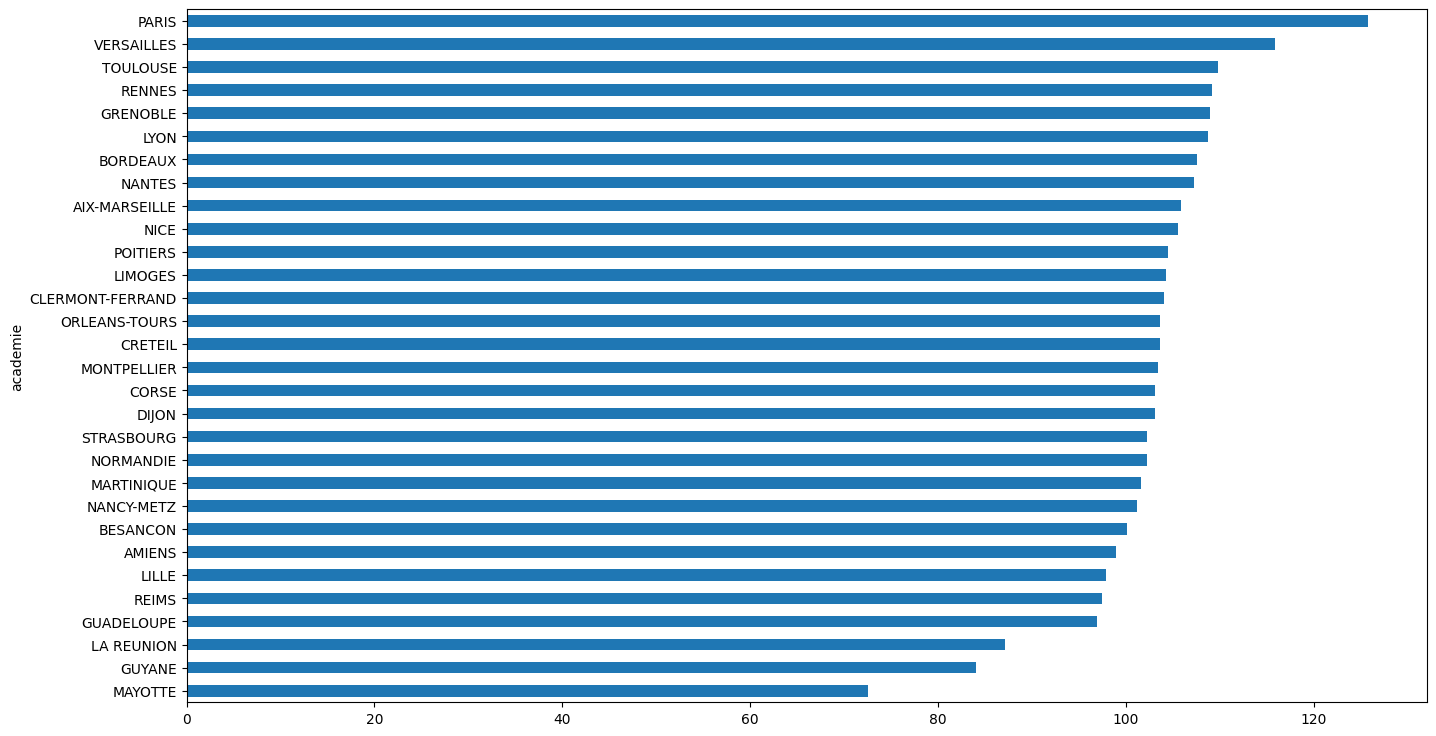

In [3]:
df.groupby('academie').apply(lambda x: np.average(x['ips'], weights=x['effectifs'])).sort_values().plot(kind='barh')

# Moyenne par département dans l'académie de Rennnes

In [4]:
df_rennes = df[df['academie'] == 'RENNES']

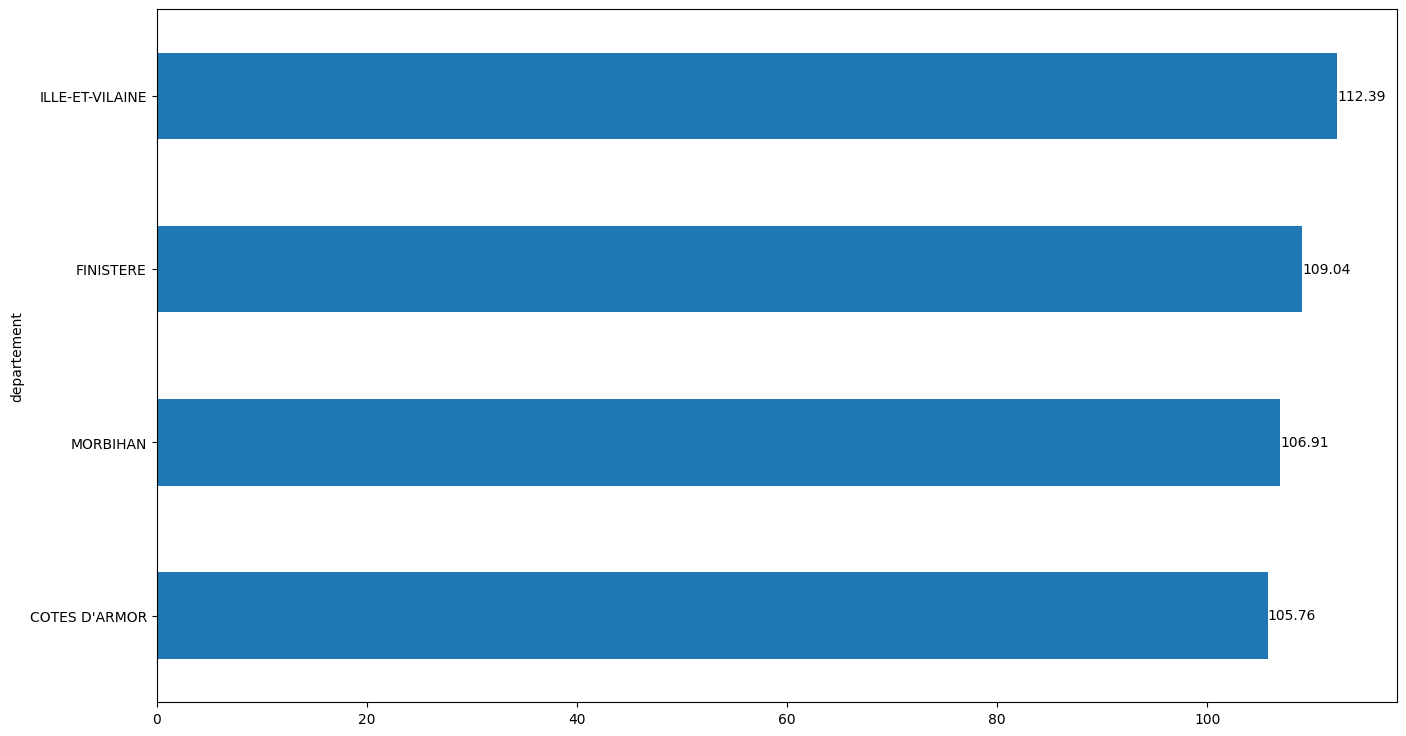

In [5]:
ax = (
    df_rennes
    .groupby('departement')
    .apply(lambda x: np.average(x['ips'], weights=x['effectifs']))
    .sort_values()
    .plot(kind='barh')
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Par commune, dans le Morbihan

In [6]:
df_morbihan = df[df['departement'] == 'MORBIHAN']

In [7]:
df_morbihan.groupby('nom_de_la_commune')['effectifs'].sum().sort_values()

nom_de_la_commune
SAINT AIGNAN            26
SEGLIEN                 26
LA CHAPELLE NEUVE       27
LA TRINITE SUR MER      28
SAINT GRAVE             28
                      ... 
AURAY                  935
HENNEBONT             1068
LANESTER              1326
LORIENT               2748
VANNES                2810
Name: effectifs, Length: 212, dtype: int64

In [8]:
regular_color, highlight_color = sns.color_palette(n_colors=2)

Text(0, 50, 'LORIENT: 101.98')

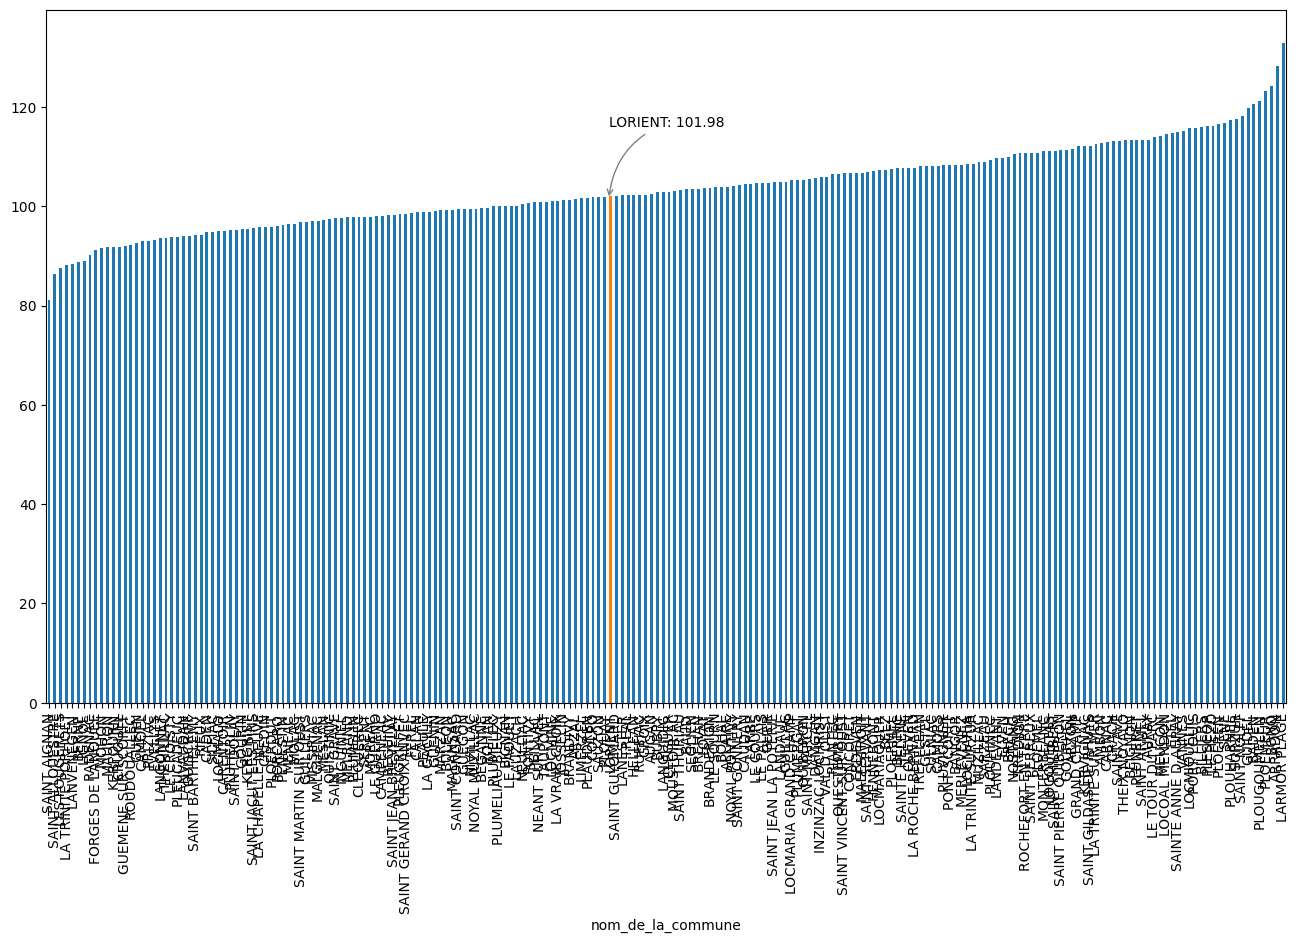

In [9]:
gpby= df_morbihan.groupby('nom_de_la_commune').apply(
    lambda x: np.average(x['ips'], weights=x['effectifs'])).sort_values()

fig, ax = plt.subplots(figsize=(16, 9)) # 0.5*len(gpby)
gpby.plot(kind='bar', ax=ax, color=[highlight_color if x == 'LORIENT' else regular_color for x in gpby.index])
ax.annotate(
    f"LORIENT: {gpby['LORIENT']:.2f}",
    xy=(ax.patches[gpby.index.get_loc('LORIENT')].get_x(), gpby['LORIENT']),
    xycoords=('data', 'data'),
    xytext=(0, 50),
    textcoords=('offset points'),
    arrowprops=dict(arrowstyle="->",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
)

In [10]:
gpby.to_frame('IPS').style

,IPS
nom_de_la_commune,
SAINT AIGNAN,81.100000
SAINT ALLOUESTRE,86.300000
LES FOUGERETS,87.600000
LA TRINITE PORHOËT,88.200000
LANVENEGEN,88.300000
BERNE,88.703226
LIGNOL,88.900000
RADENAC,90.100000
FORGES DE LANOUEE,91.300000


# Par école, à Lorient

In [11]:
df_lorient = df[df['nom_de_la_commune'] == 'LORIENT']
df_lorient = df_lorient[[
    'nom_de_l_etablissment',
    'secteur',
    'effectifs',
    'ips'
]]
df_lorient.set_index('nom_de_l_etablissment', inplace=True)
df_lorient.sort_values(by=['ips'])

,secteur,effectifs,ips
nom_de_l_etablissment,,,
ECOLE PRIMAIRE PUBLIQUE BOIS BISSONNET,public,108,65.1
ECOLE ELEMENTAIRE PUBLIQUE BOIS DU CHATEAU,public,187,67.9
ECOLE PRIMAIRE PUBLIQUE DE KERYADO,public,146,79.4
ECOLE PRIMAIRE PUBLIQUE RENE GUY CADOU,public,128,83.6
ECOLE PRIMAIRE PUBLIQUE KERFICHANT,public,133,88.4
ECOLE PRIMAIRE PUBLIQUE KERMELO,public,111,97.3
ECOLE ELEMENTAIRE PUBLIQUE BISSON,public,144,100.3
ECOLE PRIMAIRE PUBLIQUE LE MANIO,public,120,101.5
ECOLE ELEMENTAIRE PUBLIQUE KERENTRECH,public,119,102.7


In [12]:
gpby =  df_lorient.groupby('nom_de_l_etablissment').apply(
    lambda x: np.average(x['ips'], weights=x['effectifs'])).sort_values()

Text(0.5, 1.0, 'IPS par école à Lorient, bleu=public, rouge=privé')

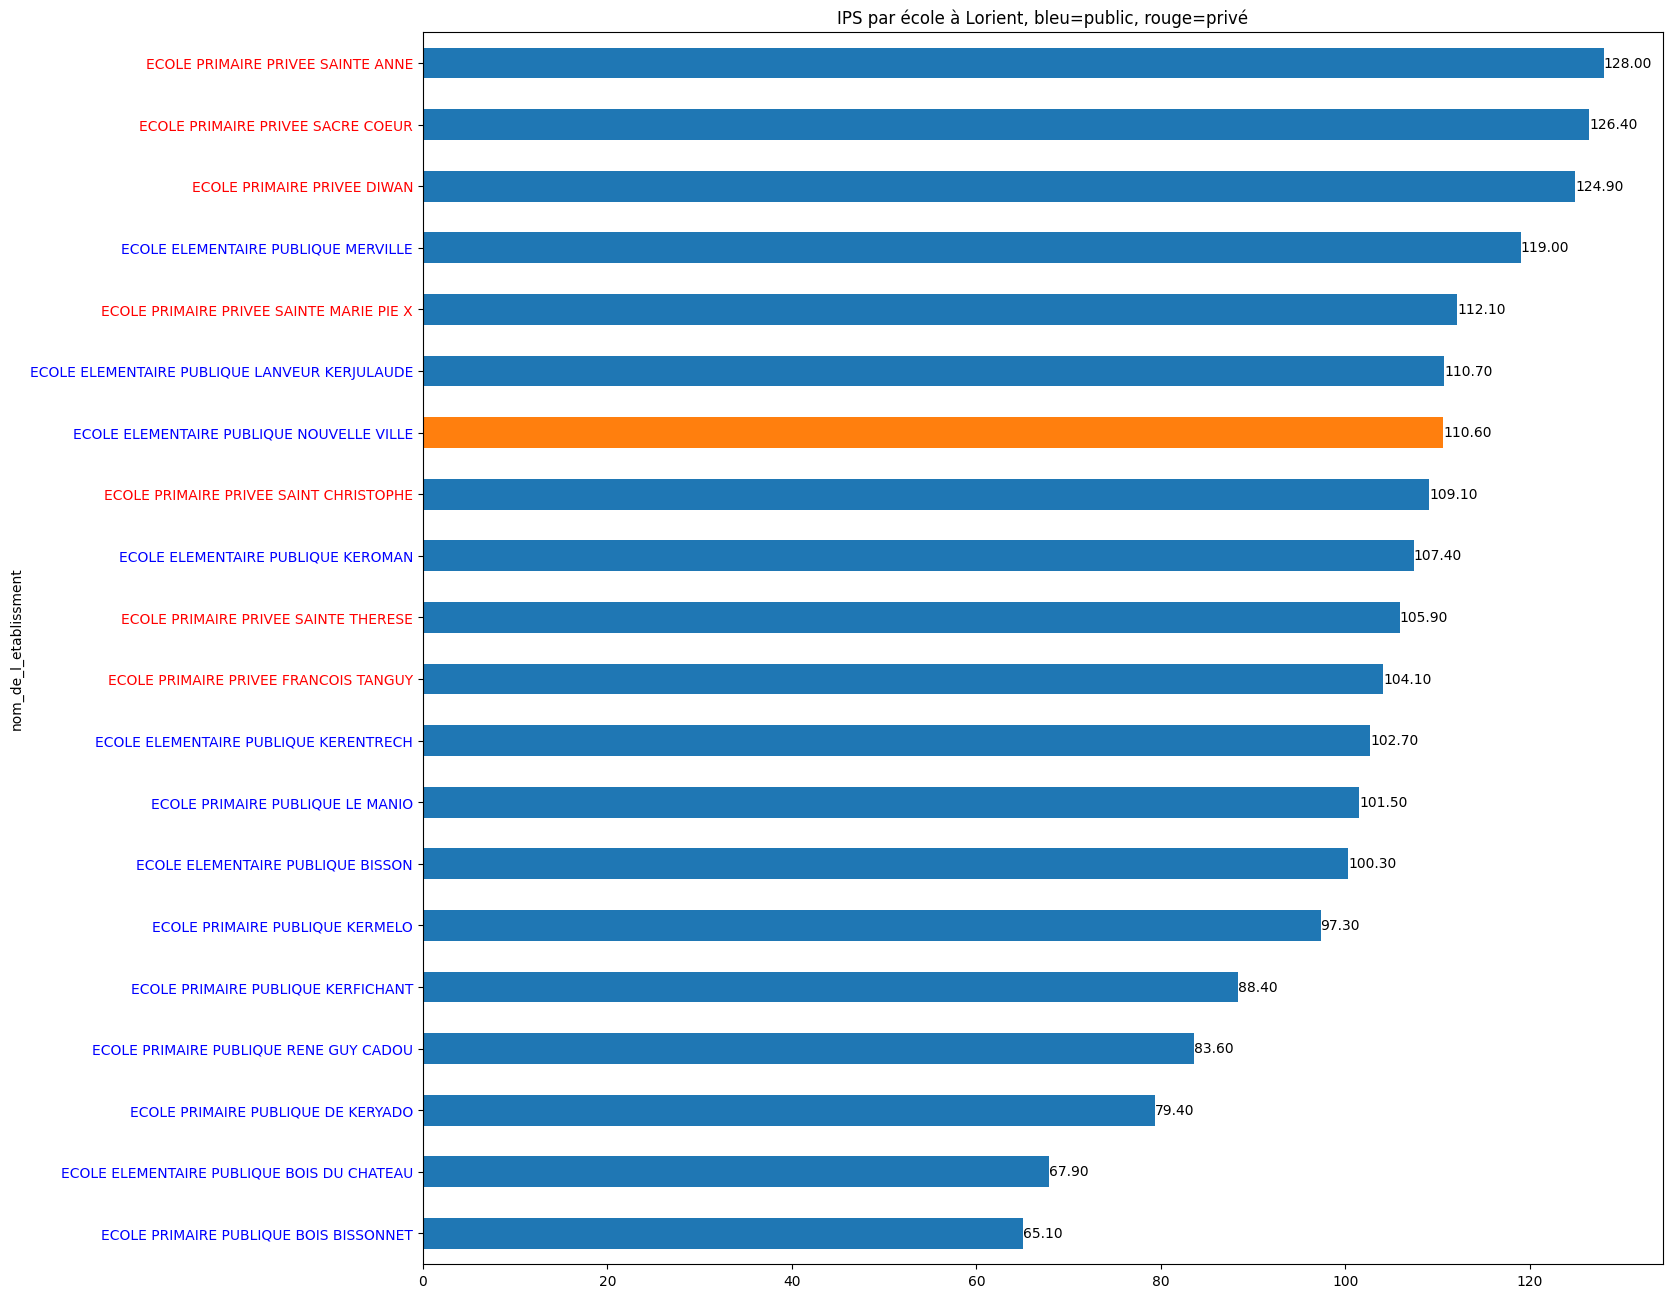

In [13]:
pt = 'ECOLE ELEMENTAIRE PUBLIQUE NOUVELLE VILLE'
fig, ax = plt.subplots(figsize=(16, 16)) # 0.5*len(gpby)
gpby.plot(kind='barh', ax=ax, color=[highlight_color if x == pt else regular_color for x in gpby.index])

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
for label in ax.get_yticklabels():
    is_public = df_lorient.loc[label.get_text(), 'secteur'] == 'public'
    if is_public:
        label.set_color('blue')
    else:
        label.set_color('red')
        
ax.set_title('IPS par école à Lorient, bleu=public, rouge=privé')